In [1]:
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style> div#notebook-container { width: 95%; }; abbr { display: inline;}  </style> "))
HTML("<head><link rel='stylesheet' href='https://maxcdn.bootstrapcdn.com/bootstrap/3.4.0/css/bootstrap.min.css'></head>") # css formating


Dataset - [Iris Dataset](https://archive-beta.ics.uci.edu/dataset/53/iris) created by R.A. Fisher (Fisher,R.A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.)

In [73]:

df = pd.read_csv("iris.data",
                 header=None,
                 names=["sepal_length", "sepal_width",
                        "petal_length","petal_width","class"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

<AxesSubplot:>

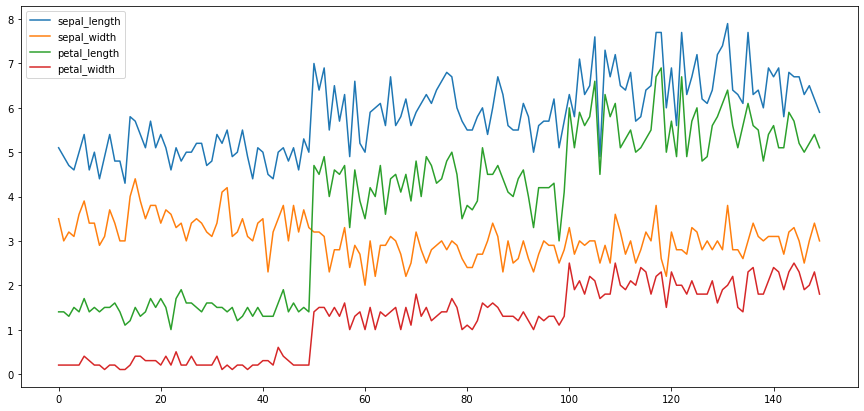

In [76]:
df.plot(figsize=(15,7))

<AxesSubplot:>

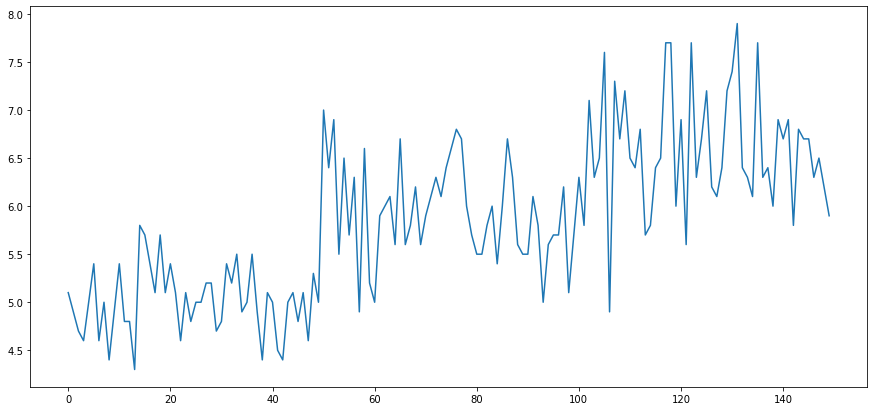

In [77]:
df["sepal_length"].plot(figsize=(15,7))

<AxesSubplot:xlabel='class'>

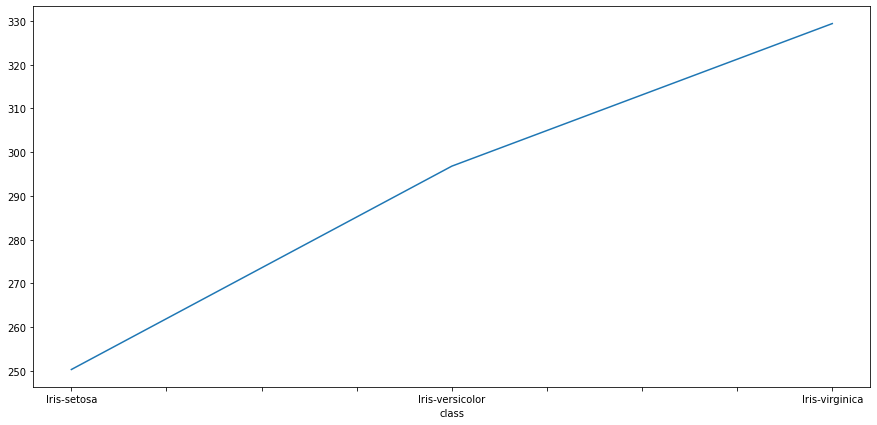

In [78]:
df.groupby("class")["sepal_length"].sum().plot(figsize=(15,7))

<AxesSubplot:ylabel='class'>

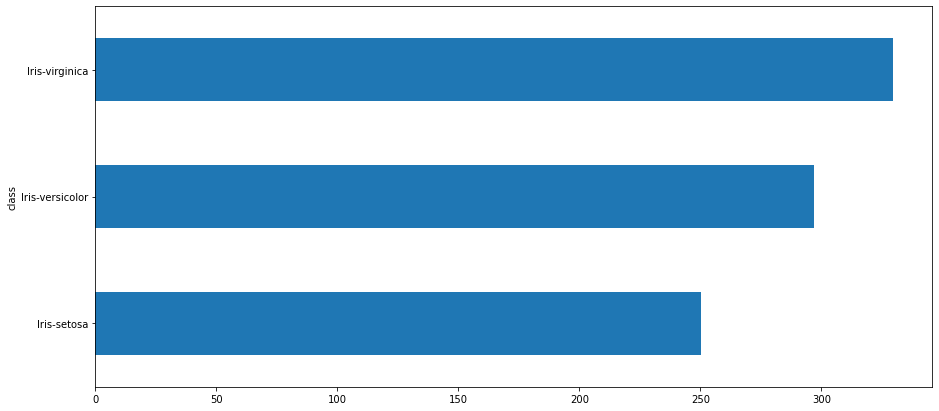

In [81]:
df.groupby("class")["sepal_length"].sum().plot(kind='barh',figsize=(15,7))

<AxesSubplot:xlabel='class'>

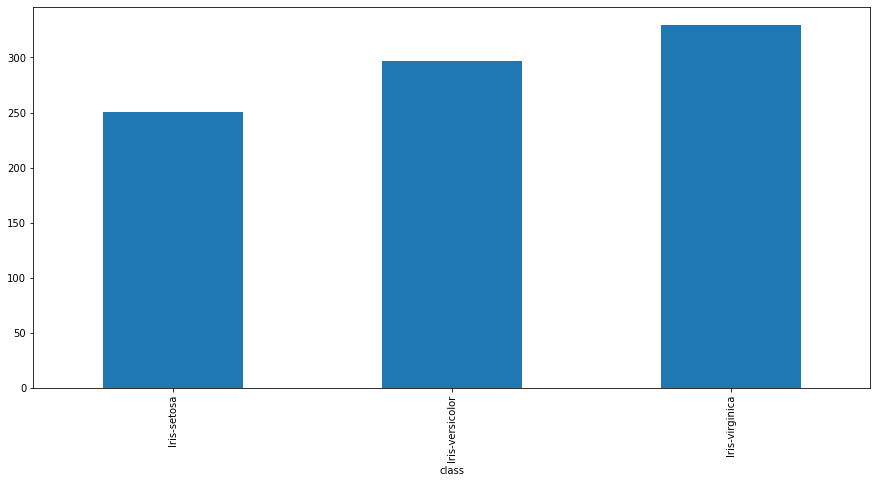

In [82]:
df.groupby("class")["sepal_length"].sum().plot(kind='bar',figsize=(15,7))

<AxesSubplot:ylabel='Frequency'>

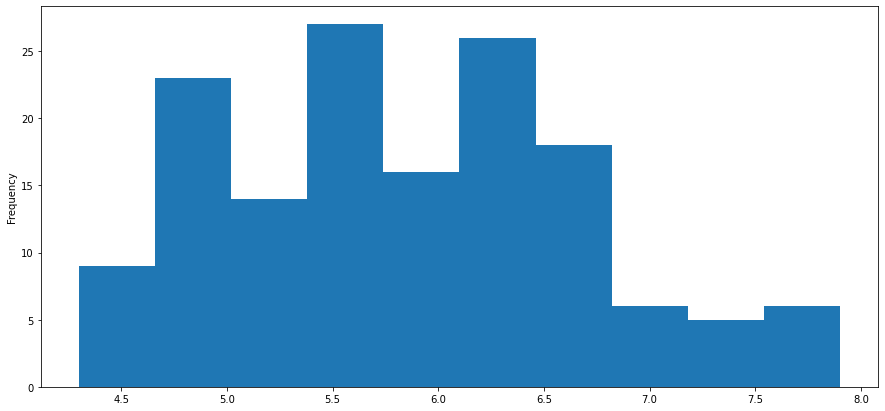

In [83]:
df["sepal_length"].plot.hist(figsize=(15,7))

In [84]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

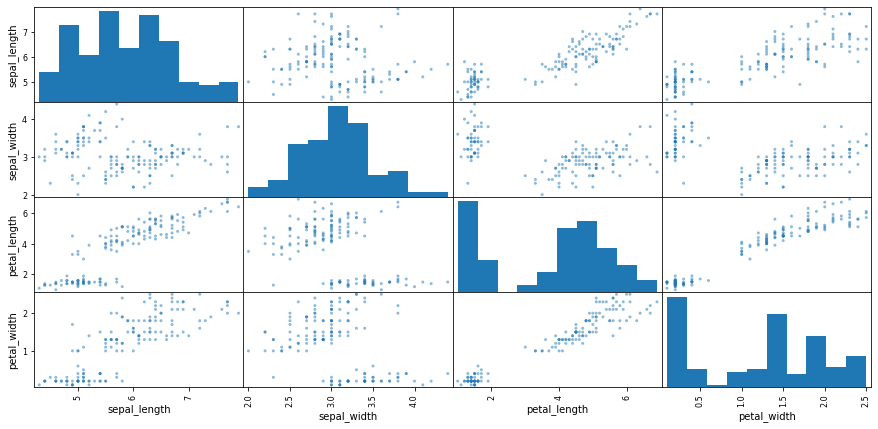

In [86]:
pd.plotting.scatter_matrix(df, figsize=(15,7));

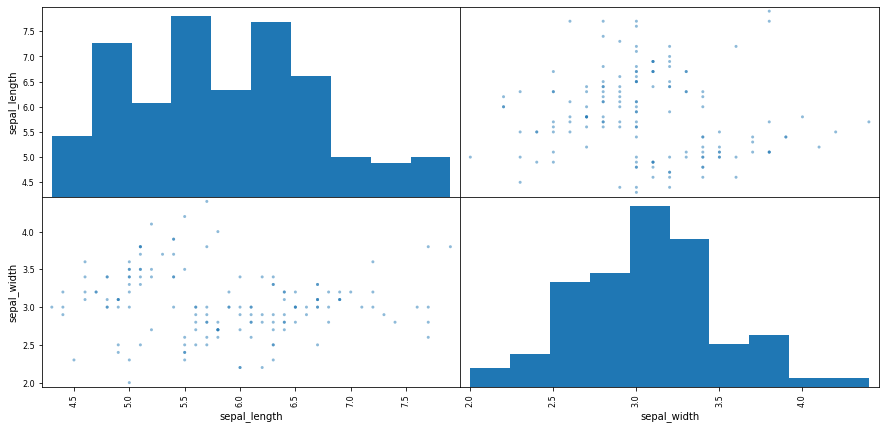

In [87]:
pd.plotting.scatter_matrix(df[["sepal_length",
                               "sepal_width"]], figsize=(15,7));

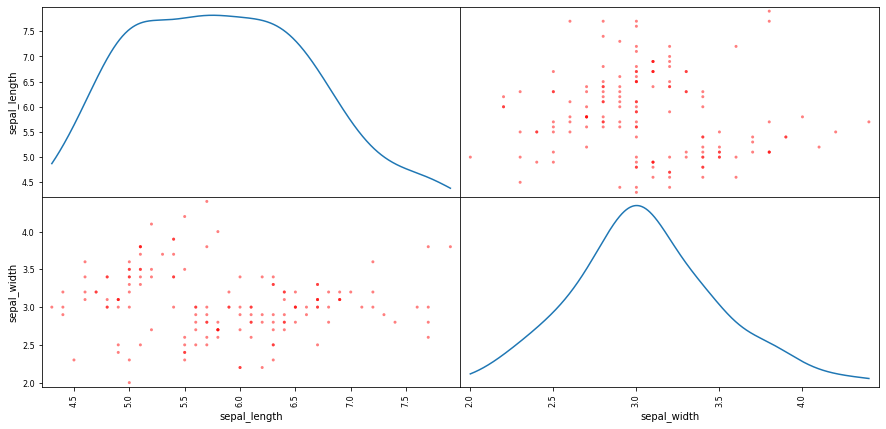

In [89]:
pd.plotting.scatter_matrix(df[["sepal_length",
                               "sepal_width"]],
                           figsize=(15,7),
                           diagonal='kde',
                           color='red');

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
bins = [0,10,20,30, 40,50, np.inf]
labels = ["'a0-10'","'b11-20'","'c21-30'","'d31-40'","'e41-50'","'f>50'"]
df['price_bucket'] = pd.cut(df['our_price'], bins=bins, labels=labels)
df.head()

In [93]:
bins = [0,5,10]
labels = ["'0-5'","'6-10'"]
df['sepal_length_bucket'] = pd.cut(df['sepal_length'],
                                   bins=bins, labels=labels)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length_bucket
0,5.1,3.5,1.4,0.2,Iris-setosa,'6-10'
1,4.9,3.0,1.4,0.2,Iris-setosa,'0-5'
2,4.7,3.2,1.3,0.2,Iris-setosa,'0-5'
3,4.6,3.1,1.5,0.2,Iris-setosa,'0-5'
4,5.0,3.6,1.4,0.2,Iris-setosa,'0-5'


In [94]:
pd.pivot_table(data=df, index = ["class"],
               columns=["sepal_length_bucket"],
               values=["sepal_width"])

sepal_width          
sepal_length_bucket       '0-5'    '6-10'
class                                    
Iris-setosa            3.185714  3.713636
Iris-versicolor        2.233333  2.804255
Iris-virginica         2.500000  2.983673

<AxesSubplot:ylabel='class'>

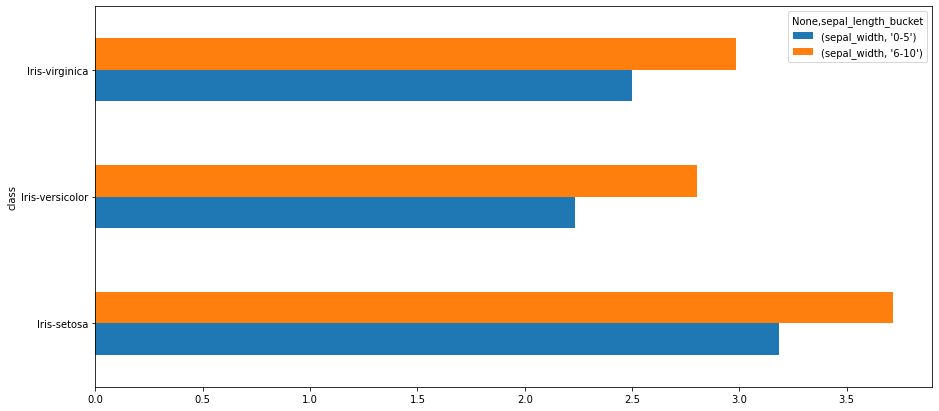

In [95]:
pd.pivot_table(data=df, index = ["class"],
               columns=["sepal_length_bucket"],
               values=["sepal_width"]).plot.barh(figsize=(15,7))